## Import Libraries

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Load the Dataset

In [35]:
df = pd.read_csv('Titanic-Dataset.csv')

## Display the First Few Rows

In [36]:
print("First few rows of the dataframe:")
print(df.head())

First few rows of the dataframe:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37

## Summary of the DataFrame

In [37]:
print("\nSummary of the dataframe:")
print(df.info())


Summary of the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Check for Missing Values

print("\nMissing values in the dataframe:")
print(df.isnull().sum())

## Fill Missing Values

In [39]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

## Convert Categorical Variables to Numerical

In [40]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

## Create a New Feature

In [41]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

## Drop Irrelevant Columns

In [42]:
df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId','SibSp','Parch'], inplace=True)

## Display the First Few Rows After Preprocessing

In [43]:
print("\nFirst few rows after preprocessing:")
print(df.head())


First few rows after preprocessing:
   Survived  Pclass  Sex   Age     Fare  Embarked  FamilySize
0         0       3    0  22.0   7.2500         2           2
1         1       1    1  38.0  71.2833         0           2
2         1       3    1  26.0   7.9250         2           1
3         1       1    1  35.0  53.1000         2           2
4         0       3    0  35.0   8.0500         2           1


## Data Visualization


Visualizing survival rate by gender:


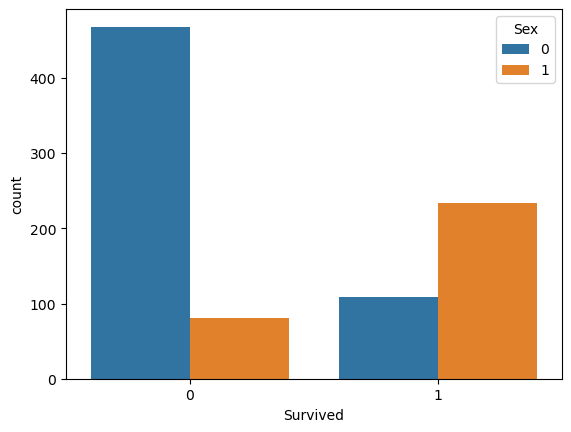


Visualizing survival rate by Pclass:


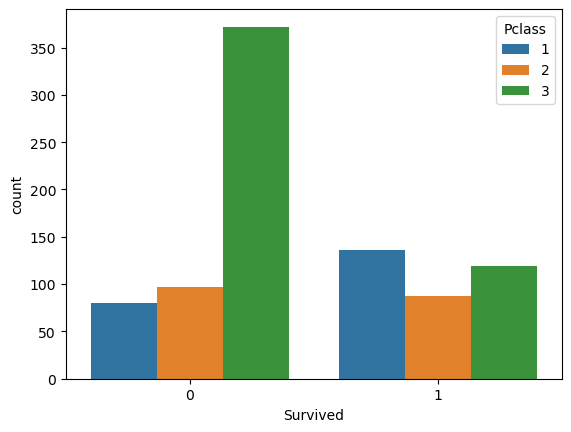


Correlation matrix:


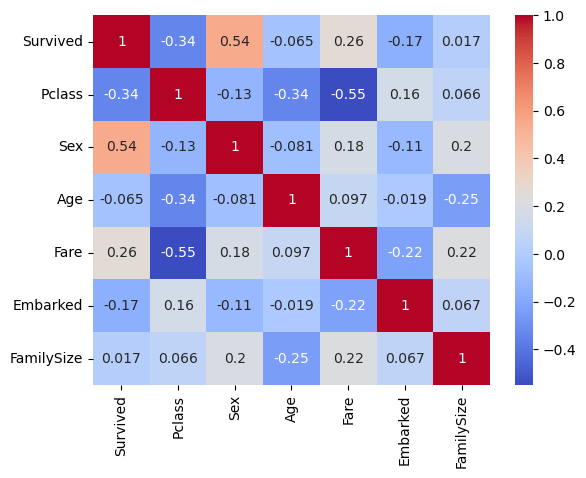

In [44]:
print("\nVisualizing survival rate by gender:")
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()

print("\nVisualizing survival rate by Pclass:")
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.show()

print("\nCorrelation matrix:")
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Split the Data

In [45]:
X = df.drop(columns='Survived')
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Train a RandomForestClassifier

In [46]:
model = RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Make Predictions

In [47]:
y_pred = model.predict(X_test)

## Evaluate the Model

In [48]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8547486033519553
Confusion Matrix:
[[100  10]
 [ 16  53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       110
           1       0.84      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

